In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pandas.plotting import scatter_matrix

from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_predict,RandomizedSearchCV
from sklearn.metrics import precision_score, recall_score,f1_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error

from sklearn.metrics import classification_report 
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB,GaussianNB, ComplementNB, BernoulliNB
from sklearn.pipeline import Pipeline
import xgboost as xgb 
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
import lightgbm as lgb

sns.set(rc = {'figure.figsize':(20,10)})
sns.set_palette("viridis")

In [3]:
train_set = pd.read_csv("train.csv")

In [8]:
corr=train_set.corr()
corr.Class.sort_values(ascending=False)

Class                 1.000000
energy                0.221837
duration_in min/ms    0.205521
loudness              0.179647
Popularity            0.159977
time_signature        0.047389
liveness              0.041245
tempo                 0.031248
id                   -0.004332
key                  -0.010587
instrumentalness     -0.025039
mode                 -0.043674
speechiness          -0.055894
valence              -0.078111
danceability         -0.101228
acousticness         -0.241062
Name: Class, dtype: float64

In [3]:
train_set.head()

,id,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,0,"Lata Mangeshkar, Hariharan",Likha Hai Yeh,23.0,0.370,0.670,7.0,-11.007,0,0.0445,0.8090,0.000006,0.2360,0.802,177.164,5.209333,3,3
1,1,Kalan.FrFr,No Love ft. Mozzy & Cypress Moreno,45.0,0.659,0.639,6.0,-8.138,1,0.3880,0.4160,NaN,0.1160,0.688,99.517,206602.000000,4,5
2,2,The Cure,Play For Today,51.0,0.458,0.731,11.0,-12.049,0,0.1450,0.0487,0.021500,0.1160,0.784,80.425,218960.000000,4,6
3,3,Miguel Poveda,Coplas Del Querer,40.0,0.508,0.287,5.0,-8.898,0,0.0481,0.8340,NaN,0.0963,0.324,96.139,332467.000000,3,9
4,4,Leif Vollebekk,Long Blue Light,63.0,0.552,0.485,9.0,-9.111,1,0.0332,0.5170,0.106000,0.1640,0.510,71.548,200173.000000,4,1


In [7]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14396 entries, 0 to 14395
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  14396 non-null  int64  
 1   Artist Name         14396 non-null  object 
 2   Track Name          14396 non-null  object 
 3   Popularity          14045 non-null  float64
 4   danceability        14396 non-null  float64
 5   energy              14396 non-null  float64
 6   key                 12784 non-null  float64
 7   loudness            14396 non-null  float64
 8   mode                14396 non-null  int64  
 9   speechiness         14396 non-null  float64
 10  acousticness        14396 non-null  float64
 11  instrumentalness    10837 non-null  float64
 12  liveness            14396 non-null  float64
 13  valence             14396 non-null  float64
 14  tempo               14396 non-null  float64
 15  duration_in min/ms  14396 non-null  float64
 16  time

In [23]:
train_set.describe().T

,count,mean,std,min,25%,50%,75%,max
id,14396.0,7197.500000,4155.911573,0.000000,3598.750000,7197.50000,10796.25000,14395.000
Popularity,14045.0,44.591954,17.436540,1.000000,33.000000,44.00000,56.00000,100.000
danceability,14396.0,0.542981,0.166668,0.059600,0.430000,0.54500,0.65900,0.989
energy,14396.0,0.663347,0.235709,0.000020,0.510000,0.70100,0.86100,0.999
key,12784.0,5.957838,3.190628,1.000000,3.000000,6.00000,9.00000,11.000
loudness,14396.0,-7.897393,4.063214,-39.952000,-9.525250,-7.00600,-5.16100,1.355
mode,14396.0,0.638580,0.480429,0.000000,0.000000,1.00000,1.00000,1.000
speechiness,14396.0,0.079479,0.083048,0.022500,0.034800,0.04740,0.08250,0.955
acousticness,14396.0,0.246606,0.310371,0.000000,0.004208,0.08075,0.43400,0.996
instrumentalness,10837.0,0.177489,0.304133,0.000001,0.000088,0.00392,0.19900,0.996


In [4]:
ids = train_set['id']
train_set.drop(columns=["id"],inplace=True)

In [5]:
train_set.drop(columns=["Track Name"],inplace=True)

In [5]:
train_set.drop(columns=["Artist Name"],inplace=True)

In [6]:
columns = ['Popularity', 'danceability', 'loudness',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_in min/ms']

In [7]:
duplicateRows = train_set[train_set.duplicated(subset = train_set.columns.difference(['Class']))]
duplicateRows.shape

(1197, 16)

In [17]:
duplicateRows

,Artist Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
501,Junkyard Drive,36.0,0.367,0.856,1.0,-11.546,1,0.0650,0.000070,0.006090,0.0492,0.322,167.849,220000.0,4,10
649,Jagwar Twin,64.0,0.396,0.770,9.0,-4.728,1,0.0600,0.018400,NaN,0.1200,0.412,177.542,170733.0,4,9
702,Don Rimini,26.0,0.764,0.961,2.0,-3.658,1,0.0559,0.172000,0.052400,0.0473,0.432,126.008,351095.0,4,6
844,White Denim,25.0,0.381,0.868,NaN,-5.885,1,0.1830,0.004290,0.008770,0.2590,0.499,110.727,239507.0,4,6
883,Dead Pony,32.0,0.431,0.777,7.0,-7.853,1,0.0494,0.000207,0.000013,0.1050,0.361,76.027,215296.0,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14353,Big Audio Dynamite,50.0,0.721,0.782,2.0,-9.723,0,0.0529,0.716000,NaN,0.2040,0.844,129.975,354627.0,4,1
14361,Deftones,57.0,0.112,0.978,4.0,-2.640,1,0.1170,0.000108,0.024100,0.1170,0.371,173.097,250222.0,3,6
14369,Cage The Elephant,78.0,0.636,0.676,2.0,-3.442,1,0.0263,0.080700,NaN,0.0831,0.273,113.980,208760.0,4,6
14370,SZA,89.0,0.436,0.655,1.0,-8.370,0,0.0583,0.499000,0.000008,0.6880,0.412,121.002,279204.0,4,9


In [8]:
train_set.drop_duplicates(subset = train_set.columns.difference(['Class']), inplace = True, ignore_index = True)

In [9]:
train_set.loc[(train_set['duration_in min/ms'] < 30)]['duration_in min/ms']

0        5.209333
6        4.456883
7        5.539867
8        4.531117
9        3.549550
           ...   
13158    4.925000
13168    3.912033
13172    6.486883
13187    4.193333
13194    4.052667
Name: duration_in min/ms, Length: 2058, dtype: float64

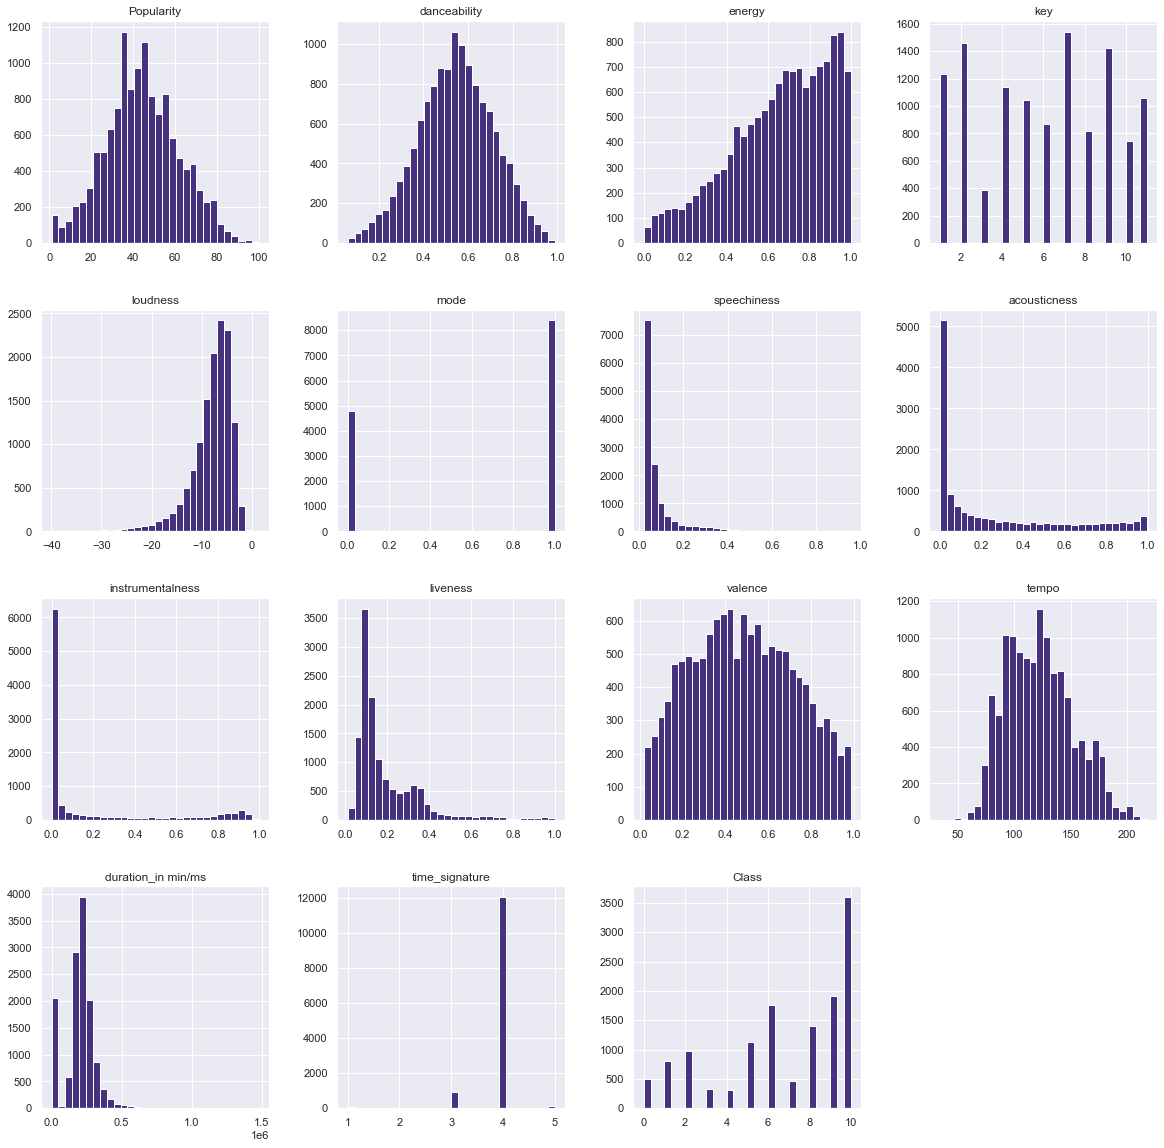

In [20]:
train_set.hist(figsize=(20,20),bins=30)
plt.show()

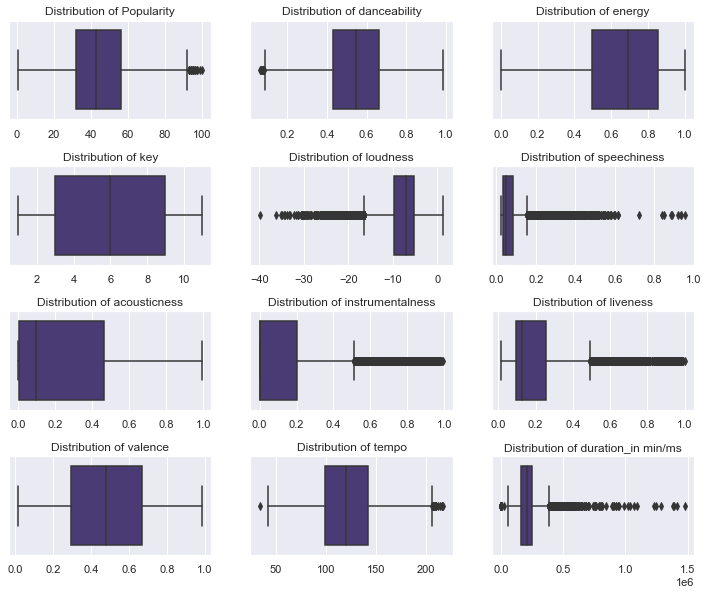

In [21]:
df_cont = train_set.select_dtypes([int,float])

fig = plt.figure(figsize=(10, 10))
for i,columns in enumerate(df_cont.columns, 1): 
    ax = plt.subplot(5,3,i)
    sns.boxplot(data = df_cont, x=df_cont[columns])
    ax.set_xlabel(None)
    ax.set_title(f'Distribution of {columns}')
    plt.tight_layout(w_pad=3)

plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


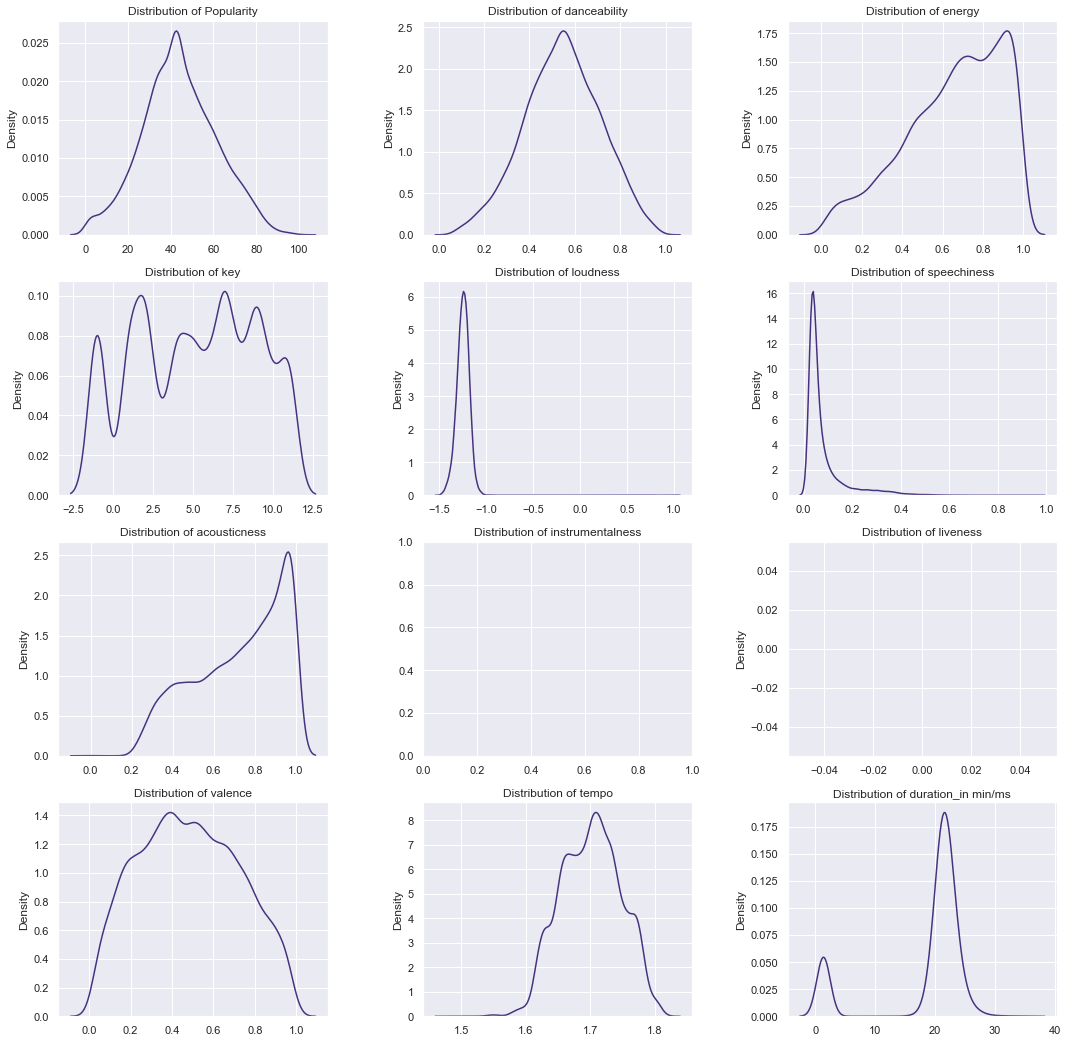

In [34]:
df_cont = train_set.select_dtypes([int,float]) # store all integer or float columns in df_cont variable

fig = plt.figure(figsize=(15, 18)) # sets the size of the 4 plot with width as 15 and height as 18
for i,columns in enumerate(df_cont.columns, 1): 
    ax = plt.subplot(5,3,i) # creates 3 subplots in one single row
    sns.kdeplot(x=df_cont[columns]) # creates kde plots for each feature in df_cont dataset
    ax.set_xlabel(None) # removes the labels on x-axis
    ax.set_title(f'Distribution of {columns}') # adds a title to each subplot
    plt.tight_layout(w_pad=3) # adds padding between the subplots
plt.show() # displays the plots

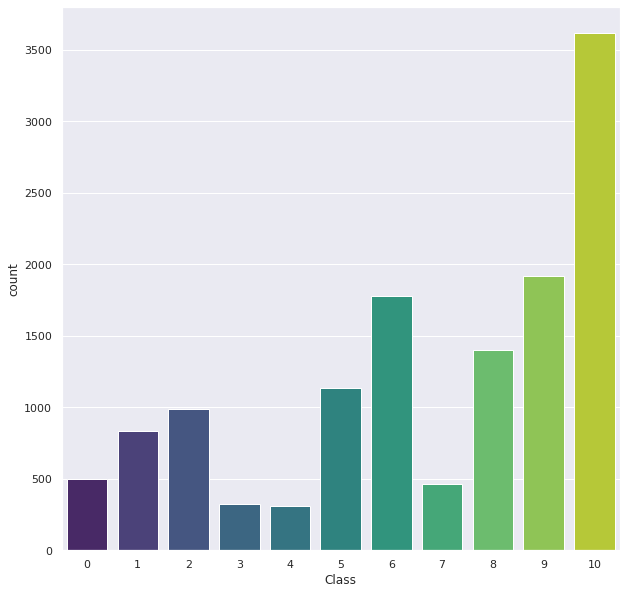

In [ ]:
fig = plt.figure(figsize=(10, 10))
sns.countplot(data = train_set, x= train_set["Class"],palette="viridis")
plt.show()

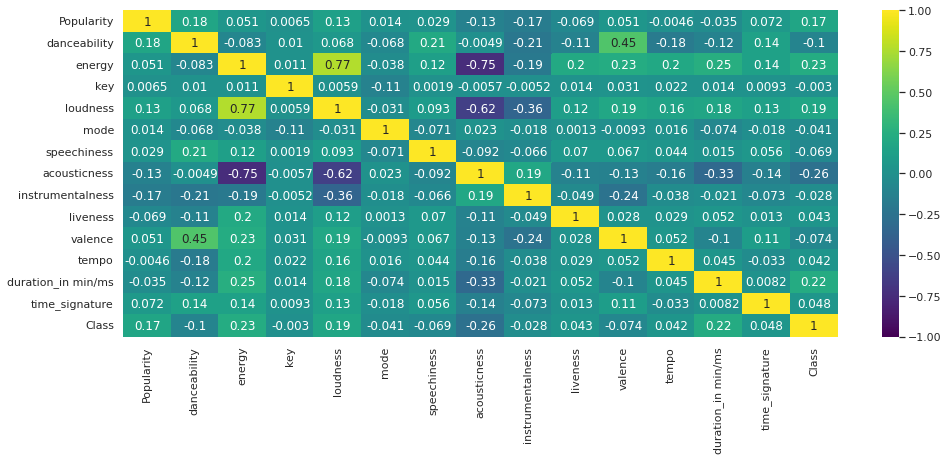

In [ ]:
plt.figure(figsize=(16, 6))
sns.heatmap(data = df_cont.corr(), vmin = -1, vmax = 1, annot = True,cmap="viridis") 

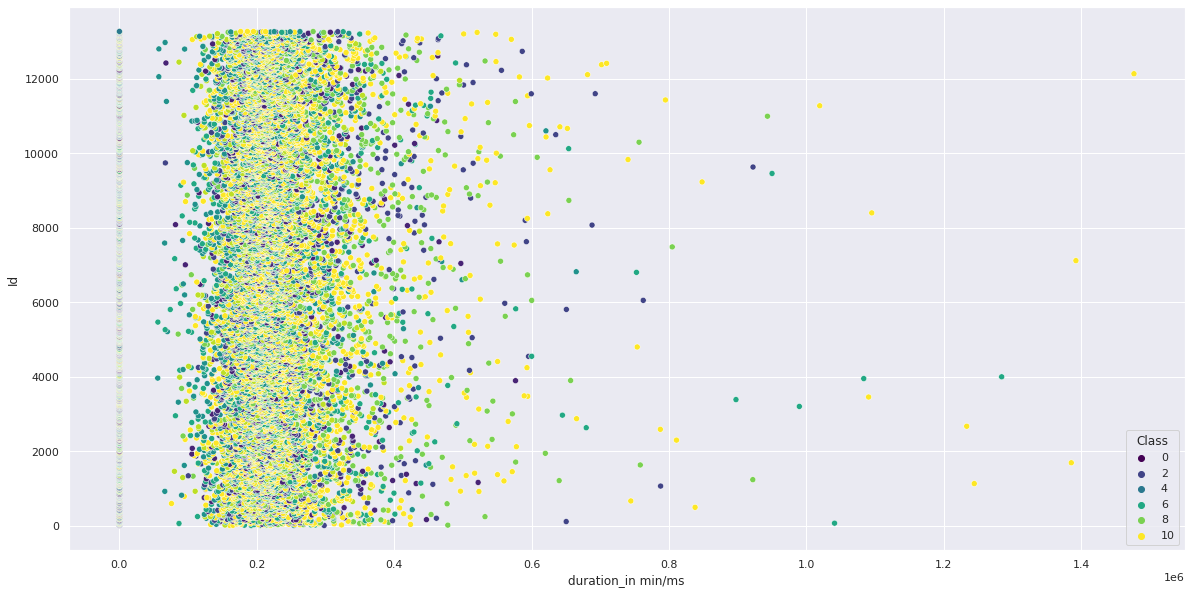

In [ ]:
sns.scatterplot(data=train_set,y=ids,x='duration_in min/ms',hue='Class',x_bins=50,palette="viridis")
plt.show()

In [22]:
train_set[["Popularity", "instrumentalness", "key"]].isna().sum()

Popularity           325
instrumentalness    3348
key                 1476
dtype: int64

### handling instrumentalness null values using model

In [20]:
train=train_set.copy()

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14396 entries, 0 to 14395
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Artist Name         14396 non-null  int32  
 1   Track Name          14396 non-null  int32  
 2   Popularity          14045 non-null  float64
 3   danceability        14396 non-null  float64
 4   energy              14396 non-null  float64
 5   key                 12784 non-null  float64
 6   loudness            14396 non-null  float64
 7   mode                14396 non-null  int64  
 8   speechiness         14396 non-null  float64
 9   acousticness        14396 non-null  float64
 10  instrumentalness    10837 non-null  float64
 11  liveness            14396 non-null  float64
 12  valence             14396 non-null  float64
 13  tempo               14396 non-null  float64
 14  duration_in min/ms  14396 non-null  float64
 15  time_signature      14396 non-null  int64  
 16  Clas

In [ ]:
train.isnull().sum()

In [21]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
train['Artist Name'] = labelencoder.fit_transform(train['Artist Name'])
train['Track Name'] = labelencoder.fit_transform(train['Track Name'])

In [22]:
null_instrumental=train.loc[train.instrumentalness.isnull()]
null_instrumental.reset_index(drop=True,inplace=True)
null_instrumental.isnull().sum()

Artist Name              0
Track Name               0
Popularity              90
danceability             0
energy                   0
key                    393
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness      3559
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
time_signature           0
Class                    0
dtype: int64

In [ ]:
train.dropna(inplace=True)

In [23]:
working_data=null_instrumental.drop("instrumentalness",axis=1)
working_data.dropna(inplace=True)
working_data.reset_index(drop=True,inplace=True)

In [ ]:
x_train=train.drop(['instrumentalness','id'],axis=1)
x_test=working_data.drop(['id'],axis=1)
y_train=train['instrumentalness']

In [ ]:
x_test.isnull().sum()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
dt = RandomForestRegressor()
dt.fit(x_train,y_train)

In [ ]:
y_predictions=dt.predict(x_test)

In [ ]:
processing1=pd.concat([x_test,pd.DataFrame({'instrumentalness':y_predictions,"id":working_data.id})],axis=1)
processing1

In [ ]:
train1=pd.concat([train,processing1],axis=0)
train1.reset_index(drop=True,inplace=True)

### handling instrumentalness null values using median

In [10]:
p_imputer = SimpleImputer(strategy='median')
train_set["Popularity"] = p_imputer.fit_transform(train_set["Popularity"].to_numpy().reshape(-1,1))

i_imputer = SimpleImputer(strategy='median')
train_set["instrumentalness"] = i_imputer.fit_transform(train_set["instrumentalness"].to_numpy().reshape(-1,1))

k_imputer = SimpleImputer(strategy='constant', fill_value = -1)
train_set["key"] = k_imputer.fit_transform(train_set["key"].to_numpy().reshape(-1,1))

In [24]:
train_set.isna().sum()

Artist Name           0
Popularity            0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
duration_in min/ms    0
time_signature        0
Class                 0
dtype: int64

In [11]:
def transformer(df:pd.DataFrame,colxtran):
  temp = df.copy()
  for column, transformation in colxtran:
    temp[column] = df[column].transform(transformation)
  return temp.copy()

cxt = [('loudness',np.cbrt),('acousticness',np.cbrt),('tempo',np.cbrt),('liveness',np.log),
       ('instrumentalness',np.log),('speechiness',np.reciprocal),('duration_in min/ms',np.sqrt)]
transformed_train = transformer(train_set,cxt)

In [12]:
train_set = transformed_train.copy()

In [14]:
train_set

,Artist Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,"Lata Mangeshkar, Hariharan",23.0,0.370,0.670,7.0,-2.224452,0,22.471910,0.931786,-11.971791,-1.443923,0.8020,5.616406,2.282396,3,3
1,Kalan.FrFr,45.0,0.659,0.639,6.0,-2.011435,1,2.577320,0.746502,-5.546779,-2.154165,0.6880,4.634104,454.534927,4,5
2,The Cure,51.0,0.458,0.731,11.0,-2.292540,0,6.896552,0.365182,-3.839702,-2.154165,0.7840,4.316486,467.931619,4,6
3,Miguel Poveda,40.0,0.508,0.287,5.0,-2.072196,0,20.790021,0.941287,-5.546779,-2.340287,0.3240,4.581066,576.599514,3,9
4,Leif Vollebekk,63.0,0.552,0.485,9.0,-2.088600,1,30.120482,0.802596,-2.244316,-1.807889,0.5100,4.151444,447.406974,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13194,"Ólafur Arnalds, Alice Sara Ott",42.0,0.140,0.159,1.0,-2.613197,0,24.937656,0.953542,-0.086648,-0.936493,0.0331,5.220029,2.013124,3,7
13195,Citizen Cope,50.0,0.659,0.882,5.0,-1.916477,1,18.975332,0.358823,-4.465408,-2.387054,0.8810,5.384351,470.998938,4,10
13196,WurlD,41.0,0.696,0.535,4.0,-2.004407,0,6.849315,0.749481,-10.903160,-2.234926,0.6620,4.513425,442.823893,4,9
13197,Rafferty,48.0,0.412,0.571,11.0,-1.817726,1,25.839793,0.672395,-5.546779,-1.439695,0.4730,5.425406,488.029712,4,9


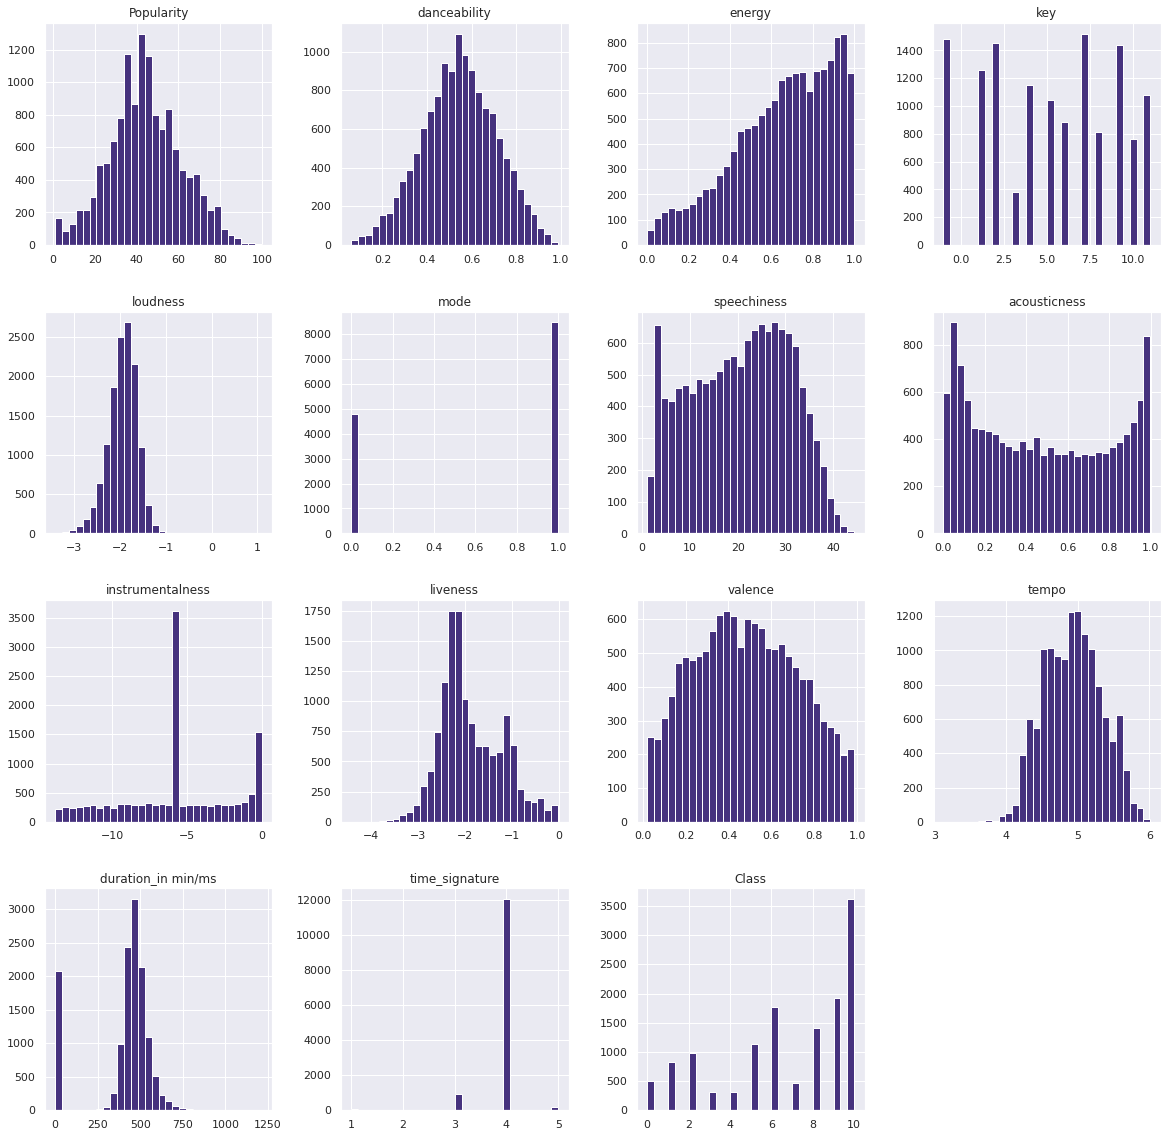

In [ ]:
transformed_train.hist(figsize=(20,20),bins=30)
plt.show()

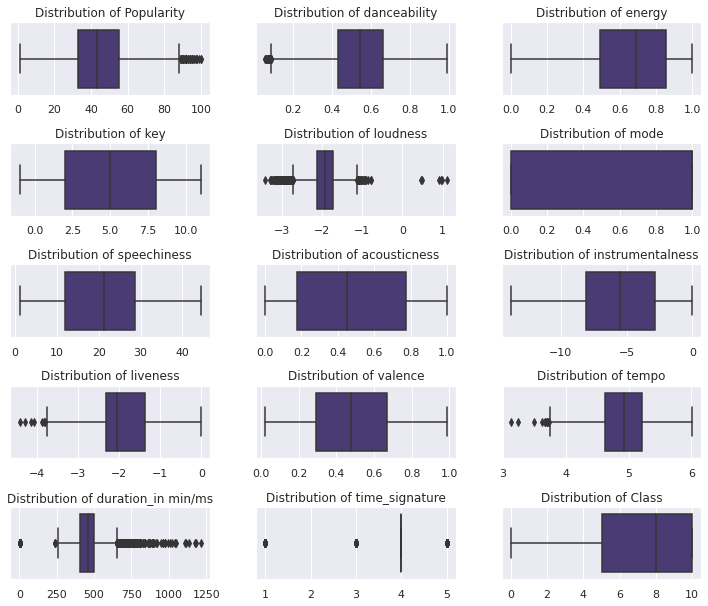

In [ ]:
df_cont = train_set.select_dtypes([int,float])

fig = plt.figure(figsize=(10, 10))
for i,columns in enumerate(df_cont.columns, 1): 
    ax = plt.subplot(6,3,i)
    sns.boxplot(data = df_cont, x=df_cont[columns])
    ax.set_xlabel(None)
    ax.set_title(f'Distribution of {columns}')
    plt.tight_layout(w_pad=3)

plt.show()

In [8]:
train_set[["key","mode","time_signature","Class"]].nunique()

key               12
mode               2
time_signature     4
Class             11
dtype: int64

In [9]:
X = train_set.drop(columns=["Class"])
y = train_set["Class"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [37]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((8843, 15), (8843,), (4356, 15), (4356,))

In [10]:
scaler = StandardScaler()
normalized_x_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)

In [11]:
normalized_x_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

In [12]:
xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(normalized_x_train,y_train)
xgb_clf.score(normalized_x_test,y_test)

0.5070511471269207

In [ ]:
rf_clf = RandomForestClassifier()
rf_clf.fit(normalized_x_train,y_train)
rf_clf.score(normalized_x_test,y_test)

0.5648698035632709

In [ ]:
kn_clf = KNeighborsClassifier()
kn_clf.fit(normalized_x_train, y_train)
kn_clf.score(normalized_x_test,y_test)


0.44380995888533575

In [ ]:
gnb_clf = GaussianNB()
gnb_clf.fit(normalized_x_train,y_train)
gnb_clf.score(normalized_x_test,y_test)

0.46779351301964367

In [ ]:
bnb_clf = BernoulliNB()
bnb_clf.fit(normalized_x_train,y_train)
bnb_clf.score(normalized_x_test,y_test)

0.3951576062128826

In [ ]:
lgr_clf = LogisticRegression(multi_class='multinomial', solver='lbfgs')
lgr_clf.fit(normalized_x_train,y_train)
lgr_clf.score(normalized_x_test,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.5102786660575606

In [ ]:
svc_clf = SVC()
svc_clf.fit(normalized_x_train,y_train)
svc_clf.score(normalized_x_test,y_test)

0.5479671082686158

In [ ]:
lgbm_clf = LGBMClassifier()
lgbm_clf.fit(normalized_x_train,y_train)
lgbm_clf.score(normalized_x_test,y_test)

0.5701233439926907

In [38]:
from catboost import Pool

cat_features = ['Artist Name']


train_dataset = Pool(data=X_train,
                     label=y_train,
                     cat_features=cat_features)

eval_dataset = Pool(data=X_test,
                    label=y_test,
                    cat_features=cat_features)

cat_clf = CatBoostClassifier(
                           loss_function='MultiClass')
cat_clf.fit(train_dataset)
cat_clf.score(eval_dataset)

Learning rate set to 0.08843
0:	learn: 2.2561691	total: 228ms	remaining: 3m 47s
1:	learn: 2.1217804	total: 329ms	remaining: 2m 44s
2:	learn: 2.0151630	total: 424ms	remaining: 2m 20s
3:	learn: 1.9334003	total: 528ms	remaining: 2m 11s
4:	learn: 1.8662816	total: 636ms	remaining: 2m 6s
5:	learn: 1.8079831	total: 739ms	remaining: 2m 2s
6:	learn: 1.7608738	total: 844ms	remaining: 1m 59s
7:	learn: 1.7172284	total: 946ms	remaining: 1m 57s
8:	learn: 1.6732914	total: 1.06s	remaining: 1m 56s
9:	learn: 1.6219597	total: 1.16s	remaining: 1m 54s
10:	learn: 1.5852423	total: 1.25s	remaining: 1m 52s
11:	learn: 1.5516043	total: 1.34s	remaining: 1m 50s
12:	learn: 1.5251013	total: 1.44s	remaining: 1m 49s
13:	learn: 1.4935013	total: 1.54s	remaining: 1m 48s
14:	learn: 1.4650235	total: 1.63s	remaining: 1m 47s
15:	learn: 1.4378060	total: 1.72s	remaining: 1m 45s
16:	learn: 1.4142107	total: 1.81s	remaining: 1m 44s
17:	learn: 1.3966905	total: 1.91s	remaining: 1m 44s
18:	learn: 1.3810039	total: 2.01s	remaining: 1m

159:	learn: 0.8939993	total: 16s	remaining: 1m 24s
160:	learn: 0.8931407	total: 16.1s	remaining: 1m 23s
161:	learn: 0.8916932	total: 16.2s	remaining: 1m 23s
162:	learn: 0.8906202	total: 16.3s	remaining: 1m 23s
163:	learn: 0.8885699	total: 16.4s	remaining: 1m 23s
164:	learn: 0.8871343	total: 16.4s	remaining: 1m 23s
165:	learn: 0.8859757	total: 16.5s	remaining: 1m 23s
166:	learn: 0.8853021	total: 16.6s	remaining: 1m 22s
167:	learn: 0.8838710	total: 16.7s	remaining: 1m 22s
168:	learn: 0.8825740	total: 16.8s	remaining: 1m 22s
169:	learn: 0.8801946	total: 16.9s	remaining: 1m 22s
170:	learn: 0.8790604	total: 17s	remaining: 1m 22s
171:	learn: 0.8779022	total: 17s	remaining: 1m 22s
172:	learn: 0.8764641	total: 17.1s	remaining: 1m 21s
173:	learn: 0.8749405	total: 17.2s	remaining: 1m 21s
174:	learn: 0.8735203	total: 17.3s	remaining: 1m 21s
175:	learn: 0.8717079	total: 17.4s	remaining: 1m 21s
176:	learn: 0.8703881	total: 17.5s	remaining: 1m 21s
177:	learn: 0.8687942	total: 17.6s	remaining: 1m 21s

316:	learn: 0.7356544	total: 31.6s	remaining: 1m 8s
317:	learn: 0.7346642	total: 31.7s	remaining: 1m 7s
318:	learn: 0.7339756	total: 31.8s	remaining: 1m 7s
319:	learn: 0.7333601	total: 31.9s	remaining: 1m 7s
320:	learn: 0.7325570	total: 32s	remaining: 1m 7s
321:	learn: 0.7311067	total: 32.1s	remaining: 1m 7s
322:	learn: 0.7306206	total: 32.2s	remaining: 1m 7s
323:	learn: 0.7299963	total: 32.3s	remaining: 1m 7s
324:	learn: 0.7292156	total: 32.4s	remaining: 1m 7s
325:	learn: 0.7286647	total: 32.5s	remaining: 1m 7s
326:	learn: 0.7279894	total: 32.6s	remaining: 1m 7s
327:	learn: 0.7268041	total: 32.7s	remaining: 1m 6s
328:	learn: 0.7260234	total: 32.8s	remaining: 1m 6s
329:	learn: 0.7253416	total: 32.9s	remaining: 1m 6s
330:	learn: 0.7247390	total: 32.9s	remaining: 1m 6s
331:	learn: 0.7238287	total: 33s	remaining: 1m 6s
332:	learn: 0.7232041	total: 33.1s	remaining: 1m 6s
333:	learn: 0.7226837	total: 33.2s	remaining: 1m 6s
334:	learn: 0.7220638	total: 33.3s	remaining: 1m 6s
335:	learn: 0.72

477:	learn: 0.6200433	total: 46.5s	remaining: 50.7s
478:	learn: 0.6197574	total: 46.5s	remaining: 50.6s
479:	learn: 0.6191342	total: 46.6s	remaining: 50.5s
480:	learn: 0.6186171	total: 46.7s	remaining: 50.4s
481:	learn: 0.6181666	total: 46.8s	remaining: 50.3s
482:	learn: 0.6174385	total: 46.9s	remaining: 50.2s
483:	learn: 0.6170187	total: 47s	remaining: 50.1s
484:	learn: 0.6160063	total: 47.1s	remaining: 50s
485:	learn: 0.6152483	total: 47.2s	remaining: 49.9s
486:	learn: 0.6149128	total: 47.3s	remaining: 49.8s
487:	learn: 0.6145672	total: 47.4s	remaining: 49.7s
488:	learn: 0.6139582	total: 47.5s	remaining: 49.6s
489:	learn: 0.6132843	total: 47.6s	remaining: 49.5s
490:	learn: 0.6127212	total: 47.7s	remaining: 49.4s
491:	learn: 0.6121700	total: 47.8s	remaining: 49.3s
492:	learn: 0.6114030	total: 47.8s	remaining: 49.2s
493:	learn: 0.6107627	total: 47.9s	remaining: 49.1s
494:	learn: 0.6103246	total: 48s	remaining: 49s
495:	learn: 0.6099459	total: 48.1s	remaining: 48.9s
496:	learn: 0.609537

638:	learn: 0.5326469	total: 1m 1s	remaining: 34.7s
639:	learn: 0.5320963	total: 1m 1s	remaining: 34.6s
640:	learn: 0.5317184	total: 1m 1s	remaining: 34.5s
641:	learn: 0.5314916	total: 1m 1s	remaining: 34.4s
642:	learn: 0.5308079	total: 1m 1s	remaining: 34.3s
643:	learn: 0.5302117	total: 1m 1s	remaining: 34.2s
644:	learn: 0.5296530	total: 1m 1s	remaining: 34.1s
645:	learn: 0.5292495	total: 1m 2s	remaining: 34s
646:	learn: 0.5287325	total: 1m 2s	remaining: 33.9s
647:	learn: 0.5283239	total: 1m 2s	remaining: 33.8s
648:	learn: 0.5280147	total: 1m 2s	remaining: 33.7s
649:	learn: 0.5276963	total: 1m 2s	remaining: 33.6s
650:	learn: 0.5273482	total: 1m 2s	remaining: 33.5s
651:	learn: 0.5266030	total: 1m 2s	remaining: 33.4s
652:	learn: 0.5261914	total: 1m 2s	remaining: 33.3s
653:	learn: 0.5256402	total: 1m 2s	remaining: 33.2s
654:	learn: 0.5249860	total: 1m 2s	remaining: 33.1s
655:	learn: 0.5244136	total: 1m 2s	remaining: 33s
656:	learn: 0.5236713	total: 1m 3s	remaining: 32.9s
657:	learn: 0.52

795:	learn: 0.4612540	total: 1m 15s	remaining: 19.5s
796:	learn: 0.4605516	total: 1m 16s	remaining: 19.4s
797:	learn: 0.4600715	total: 1m 16s	remaining: 19.3s
798:	learn: 0.4598259	total: 1m 16s	remaining: 19.2s
799:	learn: 0.4593820	total: 1m 16s	remaining: 19.1s
800:	learn: 0.4590209	total: 1m 16s	remaining: 19s
801:	learn: 0.4587466	total: 1m 16s	remaining: 18.9s
802:	learn: 0.4581224	total: 1m 16s	remaining: 18.8s
803:	learn: 0.4578219	total: 1m 16s	remaining: 18.7s
804:	learn: 0.4576112	total: 1m 16s	remaining: 18.6s
805:	learn: 0.4570802	total: 1m 16s	remaining: 18.5s
806:	learn: 0.4569302	total: 1m 16s	remaining: 18.4s
807:	learn: 0.4566435	total: 1m 17s	remaining: 18.3s
808:	learn: 0.4564021	total: 1m 17s	remaining: 18.2s
809:	learn: 0.4560175	total: 1m 17s	remaining: 18.1s
810:	learn: 0.4556396	total: 1m 17s	remaining: 18s
811:	learn: 0.4552615	total: 1m 17s	remaining: 17.9s
812:	learn: 0.4547445	total: 1m 17s	remaining: 17.8s
813:	learn: 0.4545249	total: 1m 17s	remaining: 17.

952:	learn: 0.4012750	total: 1m 30s	remaining: 4.46s
953:	learn: 0.4010758	total: 1m 30s	remaining: 4.37s
954:	learn: 0.4005304	total: 1m 30s	remaining: 4.27s
955:	learn: 0.4003775	total: 1m 30s	remaining: 4.18s
956:	learn: 0.3999588	total: 1m 30s	remaining: 4.08s
957:	learn: 0.3993218	total: 1m 30s	remaining: 3.99s
958:	learn: 0.3988929	total: 1m 31s	remaining: 3.89s
959:	learn: 0.3985925	total: 1m 31s	remaining: 3.8s
960:	learn: 0.3981024	total: 1m 31s	remaining: 3.7s
961:	learn: 0.3977295	total: 1m 31s	remaining: 3.61s
962:	learn: 0.3972254	total: 1m 31s	remaining: 3.51s
963:	learn: 0.3970377	total: 1m 31s	remaining: 3.42s
964:	learn: 0.3966280	total: 1m 31s	remaining: 3.32s
965:	learn: 0.3962612	total: 1m 31s	remaining: 3.23s
966:	learn: 0.3958733	total: 1m 31s	remaining: 3.13s
967:	learn: 0.3954444	total: 1m 31s	remaining: 3.04s
968:	learn: 0.3951064	total: 1m 32s	remaining: 2.94s
969:	learn: 0.3948503	total: 1m 32s	remaining: 2.85s
970:	learn: 0.3944947	total: 1m 32s	remaining: 2

0.6703397612488522

In [ ]:
y_pred=cat_clf.predict(X_test)

In [ ]:
print(classification_report(y_pred, y_test))

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['log2', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

rf = RandomForestClassifier()

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)
    
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X, y)

print("\n The best estimator across ALL searched params:\n",
          rf_random.best_estimator_)
    
print("\n The best score across ALL searched params:\n",
          rf_random.best_score_)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['log2', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}
Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning



 The best estimator across ALL searched params:
 RandomForestClassifier(max_depth=100, max_features='sqrt', min_samples_leaf=4,
                       min_samples_split=10, n_estimators=800)

 The best score across ALL searched params:
 0.5275272161741835


In [ ]:
rf_clf = RandomForestClassifier(max_depth=100, max_features='sqrt', min_samples_leaf=4,
                       min_samples_split=10, n_estimators=800)
rf_clf.fit(X_train,y_train)
rf_clf.score(X_test,y_test)

0.5641845591594336

In [ ]:
from sklearn.multiclass import OneVsRestClassifier

ovo_clf = OneVsRestClassifier(rf_clf,n_jobs=-1)
ovo_clf.fit(X_train, y_train)
ovo_clf.score(X_test,y_test)


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


0.5249421174489581

In [ ]:
from sklearn.ensemble import BaggingClassifier

bag_clf = BaggingClassifier(
    lgbm_model, n_estimators=10, random_state=42)
bag_clf.fit(X_train, y_train)
bag_clf.score(X_test, y_test)

0.5589440145653164

In [40]:
test_set = pd.read_csv("test.csv")

In [42]:
test_Ids = test_set["id"]

In [43]:
test_set.drop(columns=["Track Name","id"],inplace=True)

In [ ]:
train_set.drop(columns=["Artist Name"],inplace=True)

In [44]:
test_set["Popularity"] = p_imputer.transform(test_set[["Popularity"]])

test_set["instrumentalness"] = i_imputer.transform(test_set[["instrumentalness"]])

test_set["key"] = k_imputer.transform(test_set[["key"]])

In [45]:
transformed_test = transformer(test_set,cxt)
test_set = transformed_test.copy()

In [46]:
transformed_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3600 entries, 0 to 3599
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Artist Name         3600 non-null   object 
 1   Popularity          3600 non-null   float64
 2   danceability        3600 non-null   float64
 3   energy              3600 non-null   float64
 4   key                 3600 non-null   float64
 5   loudness            3600 non-null   float64
 6   mode                3600 non-null   int64  
 7   speechiness         3600 non-null   float64
 8   acousticness        3600 non-null   float64
 9   instrumentalness    3600 non-null   float64
 10  liveness            3600 non-null   float64
 11  valence             3600 non-null   float64
 12  tempo               3600 non-null   float64
 13  duration_in min/ms  3600 non-null   float64
 14  time_signature      3600 non-null   int64  
dtypes: float64(12), int64(2), object(1)
memory usage: 422.0

In [47]:
final_model = cat_clf
final_predictions = final_model.predict(test_set)

In [48]:
prediction = []
for pre in final_predictions:
  prediction.append(pre[0])

In [49]:
prediction

[10,
 10,
 10,
 10,
 9,
 9,
 10,
 1,
 5,
 9,
 10,
 9,
 10,
 9,
 5,
 10,
 9,
 9,
 5,
 10,
 4,
 6,
 10,
 8,
 10,
 9,
 10,
 10,
 3,
 9,
 8,
 8,
 6,
 3,
 1,
 10,
 6,
 10,
 1,
 9,
 10,
 2,
 10,
 8,
 5,
 10,
 9,
 10,
 9,
 0,
 0,
 9,
 10,
 1,
 5,
 6,
 10,
 8,
 2,
 6,
 2,
 10,
 10,
 2,
 9,
 6,
 10,
 10,
 8,
 6,
 6,
 2,
 1,
 5,
 1,
 10,
 7,
 5,
 1,
 2,
 2,
 4,
 8,
 10,
 9,
 3,
 8,
 6,
 10,
 6,
 9,
 6,
 10,
 10,
 10,
 10,
 8,
 5,
 0,
 1,
 10,
 8,
 8,
 5,
 2,
 10,
 10,
 2,
 8,
 7,
 2,
 8,
 6,
 9,
 9,
 9,
 10,
 9,
 10,
 10,
 8,
 9,
 7,
 5,
 7,
 8,
 9,
 0,
 10,
 10,
 9,
 6,
 1,
 5,
 0,
 6,
 10,
 10,
 10,
 6,
 10,
 6,
 9,
 1,
 10,
 10,
 1,
 5,
 2,
 6,
 5,
 6,
 10,
 6,
 10,
 7,
 10,
 9,
 6,
 9,
 10,
 9,
 10,
 10,
 0,
 2,
 3,
 10,
 6,
 9,
 10,
 6,
 0,
 8,
 5,
 2,
 10,
 10,
 8,
 6,
 9,
 10,
 7,
 4,
 6,
 10,
 10,
 10,
 6,
 10,
 10,
 10,
 4,
 9,
 9,
 6,
 8,
 6,
 1,
 10,
 4,
 8,
 0,
 2,
 9,
 9,
 10,
 8,
 10,
 2,
 10,
 8,
 2,
 8,
 10,
 0,
 1,
 6,
 3,
 10,
 6,
 5,
 10,
 9,
 0,
 0,
 10,
 6,
 3,
 10,
 8,
 5,


In [50]:
submission = pd.DataFrame({'id':test_Ids,'Class':prediction})

In [52]:
submission

,id,Class
0,0,10
1,1,10
2,2,10
3,3,10
4,4,9
...,...,...
3595,3595,10
3596,3596,10
3597,3597,6
3598,3598,7


In [53]:
submission.to_csv('submission.csv',index=False)